In [96]:
!pip install yfinance

In [97]:
 #LSTM
 # past 60 day stock price
 import math
 import numpy as np
 import pandas as pd
 from pandas_datareader import data as pdr
 from sklearn.preprocessing import MinMaxScaler
 from keras.models import Sequential
 from keras.layers import Dense, LSTM
 import matplotlib.pyplot as plt
 import yfinance as yfin
 yfin.pdr_override()
 plt.style.use('fivethirtyeight')
 #note: 20 -> 0.9
 #:   25 -> 0.8

In [98]:
stock = '2317.TW'
startDate = '2012-01-01'
endDate = '2022-03-21'

In [99]:
# cuz this stock elavated since 2020 the previous data won't be a good training set
df = pdr.get_data_yahoo(stock, startDate, endDate)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,65.883789,65.883789,65.005341,65.005341,46.720982,73391723
2012-01-03,65.644211,66.283089,65.404633,66.043510,47.467144,106025432
2012-01-04,66.283089,67.001816,66.123367,66.442802,47.754124,134356566
2012-01-05,66.762245,66.762245,66.203232,66.442802,47.754124,100068694
2012-01-06,66.762245,67.401115,66.283089,67.001816,48.155903,52920679
...,...,...,...,...,...,...
2022-03-14,103.000000,104.000000,102.500000,102.500000,102.500000,25796152
2022-03-15,102.000000,103.000000,101.000000,101.000000,101.000000,31099190
2022-03-16,101.500000,102.500000,100.000000,101.500000,101.500000,35941142


In [100]:
df.shape

(2494, 6)

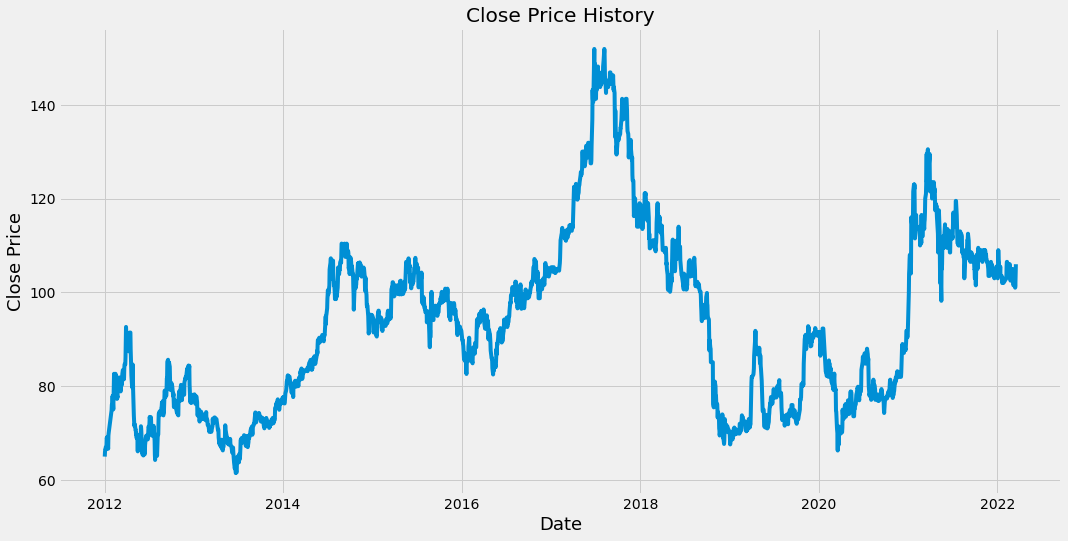

In [101]:
#visualize the clozing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [102]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8) #training set length
training_data_len 

1996

In [103]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0388766 ],
       [0.05036288],
       [0.05478064],
       ...,
       [0.44265246],
       [0.47031238],
       [0.49244033]])

In [104]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

#60 is the number of data machine knows when predicting
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.0388766 , 0.05036288, 0.05478064, 0.05478064, 0.06096554,
       0.06449985, 0.08305457, 0.08128742, 0.08482164, 0.07245182,
       0.05743132, 0.08835595, 0.09454085, 0.14843795, 0.1616913 ,
       0.16080777, 0.17406112, 0.18201318, 0.15020502, 0.17936249,
       0.21647202, 0.23414321, 0.22088978, 0.22530762, 0.21205418,
       0.23414321, 0.22088978, 0.21647202, 0.2005679 , 0.17494474,
       0.18201318, 0.17759542, 0.194383  , 0.22530762, 0.22530762,
       0.22530762, 0.20763643, 0.20145152, 0.19261593, 0.21205418,
       0.21647202, 0.20763643, 0.22530762, 0.23414321, 0.23856097,
       0.24297881, 0.23856097, 0.22088978, 0.22530762, 0.24739656,
       0.25623216, 0.25623216, 0.27390335, 0.31808132, 0.3445881 ,
       0.33133467, 0.30041013, 0.29157454, 0.30041013, 0.30041013])]
[0.2871567800798549]

[array([0.0388766 , 0.05036288, 0.05478064, 0.05478064, 0.06096554,
       0.06449985, 0.08305457, 0.08128742, 0.08482164, 0.07245182,
       0.05743132, 0.08835595, 0.094

In [105]:
#convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [106]:
#reshape to 3-dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1936, 60, 1)

In [107]:
#LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [108]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [109]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=4)

Epoch 1/4
1936/1936 [==============================] - 56s 27ms/step - loss: 0.0022
Epoch 2/4
1936/1936 [==============================] - 36s 19ms/step - loss: 8.8929e-04
Epoch 3/4
1936/1936 [==============================] - 37s 19ms/step - loss: 6.1865e-04
Epoch 4/4
1936/1936 [==============================] - 36s 19ms/step - loss: 5.0408e-04


In [110]:
#Create the testing data set
#Create a new array containing scaled values from index 1500 to 1950
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [111]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [112]:
#Reshape to 3-dimension
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [113]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions.shape
predictions = scaler.inverse_transform(predictions)


In [114]:
#Get the root mean squared error (RMSE)
#measure how good the prediction is
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.10395673575650258

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


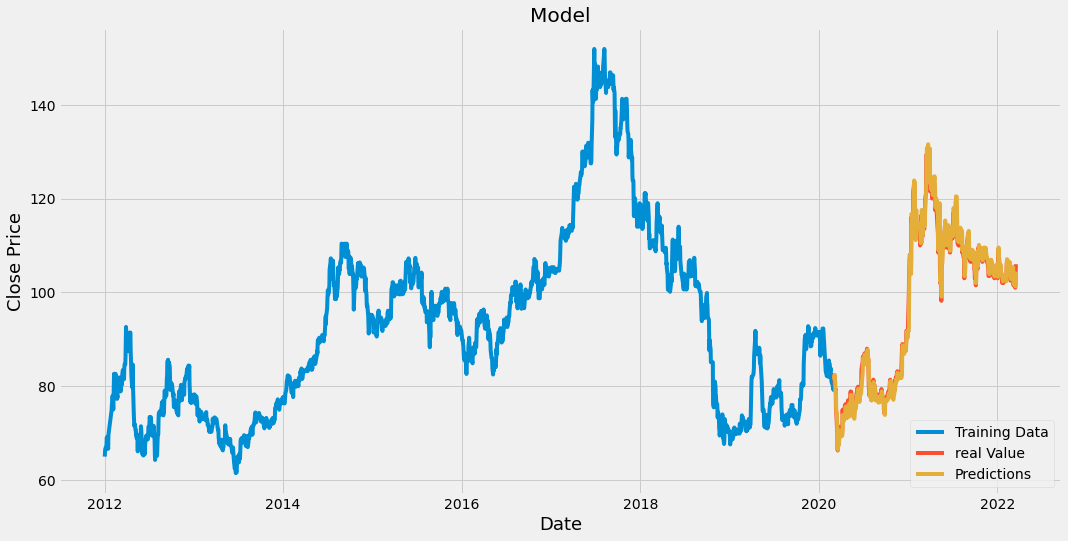

In [115]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data', 'real Value', 'Predictions'], loc='lower right')
plt.show()

In [116]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2020-03-05,82.699997,81.368607
2020-03-06,80.800003,82.364777
2020-03-09,79.099998,80.763618
2020-03-10,79.400002,78.899857
2020-03-11,78.599998,78.899345
...,...,...
2022-03-14,102.500000,104.011993
2022-03-15,101.000000,102.942665
2022-03-16,101.500000,101.303993


In [117]:
#Get the quote
stock_quote = pdr.DataReader(stock, data_source='yahoo', start=startDate, end=endDate)
#Create a snew dataframe
new_df = stock_quote.filter(['Close'])
#get the last 60 day
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[106.588974]]


In [118]:

#get the answer
tsmc_quote2 = pdr.DataReader(stock, data_source='yahoo', start=startDate, end=endDate)
print(tsmc_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2012-01-02     65.005341
2012-01-03     66.043510
2012-01-04     66.442802
2012-01-05     66.442802
2012-01-06     67.001816
                 ...    
2022-03-14    102.500000
2022-03-15    101.000000
2022-03-16    101.500000
2022-03-17    104.000000
2022-03-18    106.000000
Name: Close, Length: 2494, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


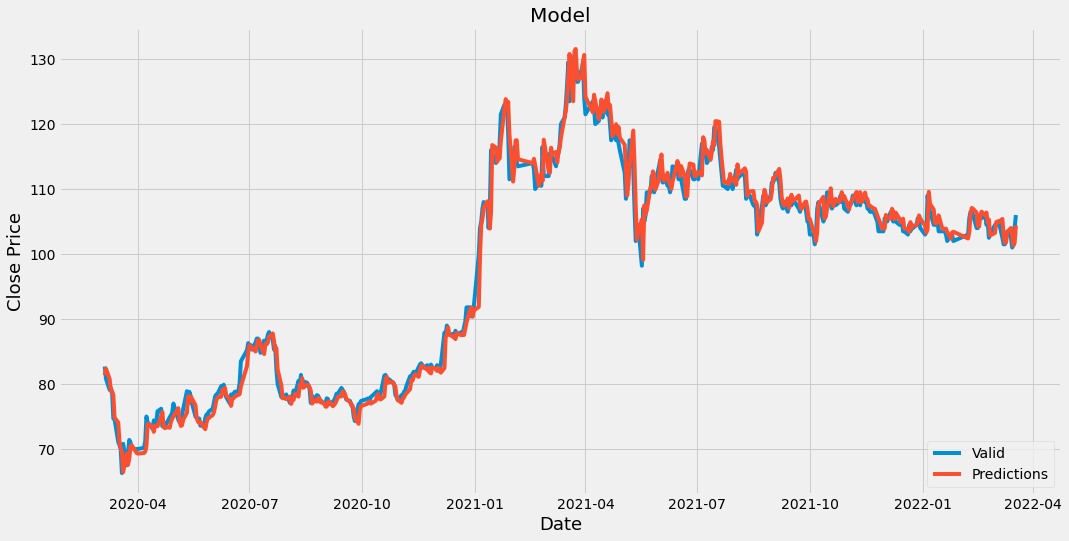

In [119]:
#plot the data

valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Valid', 'Predictions'], loc='lower right')
plt.show()